<a href="https://colab.research.google.com/github/Anjelene-antonisamy/Python-Data/blob/main/Copy_of_Copy_of_Copy_of_Copy_of_Air_quality_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clean and wrangle air quality data

The following data file contains data collected at a roadside monitoring station.  You can see the data in a spreadsheet here: https://docs.google.com/spreadsheets/d/1XpAvrpuyMsKDO76EZ3kxuddBOu7cZX1Od4uEts14zco/edit?usp=sharing

The data contains:
* a heading line (Chatham Roadside) which needs to be skipped
* dates which are sometimes left- and sometimes right-justified indicating that they are not formatted as dates, rather they are text (so need to be converted to dates)
* times which are not all in the same format
* Nitrogen Dioxide levels which are, again, text and sometimes contain nodata
* Status which is always the same





### Project - clean, sort and wrangle the data

Read the dataset into a dataframe, skipping the first row   
Convert dates to date format  
Remove rows with nodata in the Nitrogen dioxide column  
Convert the Nitrogen dioxide levels values to float type  
Sort by Nitrogen dioxide level  
Create a new column for 'Weekdays' (use df['Date'].dt.weekday)  
Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)  
Remove the Status column  

The dataset can be viewed here:  https://drive.google.com/file/d/1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ/view?usp=sharing  and the data accessed here: https://drive.google.com/uc?id=1SOe9b4VJ1FCtDVgZ2T8d00-jTw2Kux1i  This is a .csv file  

**NOTE:** Some useful references are included at the bottom of this spreadsheet.

Use the code cell below to work your code.

In [ ]:
import pandas as pd
url=' https://drive.google.com/uc?id=1SOe9b4VJ1FCtDVgZ2T8d00-jTw2Kux1i'
df=pd.read_csv(url, skiprows=1)
df.info()
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df
df.dropna(subset=['Nitrogen dioxide'], inplace=True)
df
df['Nitrogen dioxide'] = pd.to_numeric(df['Nitrogen dioxide'], errors='coerce')

df.sort_values(['Nitrogen dioxide'],ascending=True)
df
df['weekday']=df['Date'].dt.weekday
df
rename=df.rename(columns={'Nitrogen dioxide': 'NO2 level(Vug/m2)' })
print(rename)
del rename["Status"]
print(rename)







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8784 non-null   object
 1   Time              8784 non-null   object
 2   Nitrogen dioxide  8784 non-null   object
 3   Status            8784 non-null   object
dtypes: object(4)
memory usage: 274.6+ KB
           Date      Time  NO2 level(Vug/m2)   Status  weekday
0    2020-01-01      1:00           41.07113  V µg/m³        2
1    2020-01-01      2:00           38.96040  V µg/m³        2
2    2020-01-01      3:00           35.12313  V µg/m³        2
3    2020-01-01      4:00           35.85312  V µg/m³        2
4    2020-01-01      5:00           32.10503  V µg/m³        2
...         ...       ...                ...      ...      ...
8779 2020-12-31     20:00           24.46940  V µg/m³        3
8780 2020-12-31     21:00           22.62313  V µg/m³        3
8781 2020

<ipython-input-27-f231db6a6aad>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


### Expand the dataset and show summary statistics for larger dataset
---

There is a second data set here covering the year 2021:  https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ  

Concatenate the two datasets to expand it to 2020 and 2021.  

Before you can concatenate the datasets you will need to clean and wrangle the second dataset in the same way as the first.  Use the code cell below.  Give the second dataset a different name.

After the datasets have been concatenated, group the data by Weekdays and show summary statistics by day of the week.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8760 non-null   object
 1   Time              8760 non-null   object
 2   Nitrogen dioxide  8760 non-null   object
 3   Status            8760 non-null   object
dtypes: object(4)
memory usage: 273.9+ KB
           Date   Time  NO2 level(Vug/m2)   Status  weekday
0    2021-01-01  01:00           16.58269  V µg/m³        4
1    2021-01-01  02:00           14.00478  V µg/m³        4
2    2021-01-01  03:00           15.35208  V µg/m³        4
3    2021-01-01  04:00           13.49688  V µg/m³        4
4    2021-01-01  05:00           12.47511  V µg/m³        4
...         ...    ...                ...      ...      ...
8755 2021-12-31  20:00           12.51492  P µg/m³        4
8756 2021-12-31  21:00           14.00046  P µg/m³        4
8757 2021-12-31  22:00           10.

<ipython-input-6-22c263a0a535>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['Date'] = pd.to_datetime(df1['Date'], infer_datetime_format=True)
<ipython-input-6-22c263a0a535>:24: FutureWarning: ['Date', 'Time', 'Status'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_weekdaysort = weekdaysort.agg(['mean', 'median', 'std'])


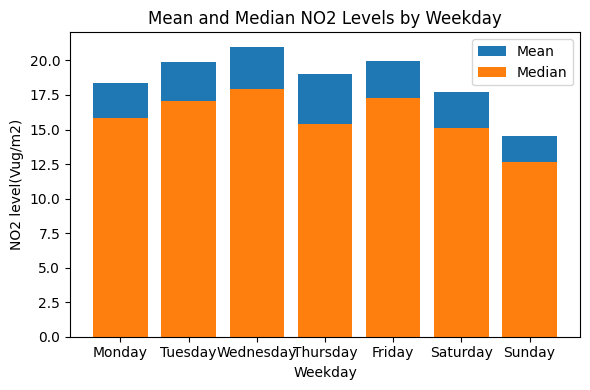

KeyError: ignored

In [6]:
import pandas as pd
url=' https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ'
df1=pd.read_csv(url, skiprows=1)
df1.info()
df1['Date'] = pd.to_datetime(df1['Date'], infer_datetime_format=True)
df1
df1.dropna(subset=['Nitrogen dioxide'], inplace=True)
df1
df1['Nitrogen dioxide'] = pd.to_numeric(df1['Nitrogen dioxide'], errors='coerce')

df1.sort_values(['Nitrogen dioxide'],ascending=True)
df1
df1['weekday']=df1['Date'].dt.weekday
df1
rename1=df1.rename(columns={'Nitrogen dioxide': 'NO2 level(Vug/m2)' })
print(rename1)
del rename1["Status"]
print(rename1)
concatdf=pd.concat([df1, rename1], axis=0)
print(concatdf)
concatdf.info()
weekdaysort = concatdf.groupby('weekday')
print(weekdaysort)
summary_weekdaysort = weekdaysort.agg(['mean', 'median', 'std'])
print(summary_weekdaysort)
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
mean_values = summary_weekdaysort['NO2 level(Vug/m2)', 'mean']
median_values = summary_weekdaysort['NO2 level(Vug/m2)', 'median']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(6, 4))
plt.bar(weekdays, mean_values, label='Mean')
plt.bar(weekdays, median_values, label='Median')
plt.xlabel('Weekday')
plt.ylabel('NO2 level(Vug/m2)')
plt.title('Mean and Median NO2 Levels by Weekday')
plt.legend()
plt.tight_layout()
plt.show()




### Helpful references

> Indented block


---
Skipping rows when reading datasets:  
https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/  

Converting strings to dates:  
https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

Dropping rows where data has a given value:  
https://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/  
(see section Drop a row or observation by condition)

Convert a column of strings to a column of floats:
https://datatofish.com/convert-string-to-float-dataframe/  

Create a new column from data converted in an existing column:  
https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/  

Rename a column:  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html  

Remove a column by name:  
https://www.kite.com/python/answers/how-to-delete-columns-from-a-pandas-%60dataframe%60-by-column-name-in-python#:~:text=Use%20the%20del%20keyword%20to,the%20name%20column_name%20from%20DataFrame%20.
